# EE 538: Low-Noise Analog Circuit Design
## Spring 2021
## Instructor: Jason Silver

## Announcements

 - Design project presentations on Wednesday, June 2
     - Final report due Friday, June 11 at midnight     

## Week 8

 - Analog MOS Integrated Circuits for Signal Processing
 - CMOS Mixed-Signal Circuit Design, $2^{nd}$ edition
 - Circuit Techniques for Reducing the Effects of Op-Amp Imperfections
 - Simulating Switched-Capacitor Filters with SpectreRF, Ken Kundert

## Overview

 - Last time...
     - TIA frequency response and noise
     - Shot noise limit and minimizing added noise
     - Cascode isolation of photodiode capacitance
     - Regulated (i.e. gain-boosted) cascode
     - Boostrapping photodiode capacitance
 - Today...


## Python packages/modules

In [106]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
import numpy as np
from scipy import signal
from scipy import integrate
from scipy.fft import fft
#%matplotlib notebook

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_2xy(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.plot(x, y1, 'b', label=y1label)
    ax.plot(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )
    
def plot_3xy(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.plot(x, y1, 'b', label=y1label)
    ax.plot(x, y2, 'r', label=y2label)
    ax.plot(x, y3, 'g', label=y3label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  

def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)    
    
def plot_log3xy(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.semilogx(x, y3, 'g', label=y3label)  
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_log2xy(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
def plot_loglog2(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.loglog(x, y1, 'b', label=y1label)
    ax.loglog(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_NF_vs_Rs(en_vals, in_vals, Rs_min, Rs_max, T_in_K):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    F1 = 1 + (en_vals[0]**2+Rs**2*in_vals[0]**2)/(4*k*T_in_K*Rs)
    F2 = 1 + (en_vals[1]**2+Rs**2*in_vals[1]**2)/(4*k*T_in_K*Rs)
    F3 = 1 + (en_vals[2]**2+Rs**2*in_vals[2]**2)/(4*k*T_in_K*Rs)
    ax.semilogx(Rs, 10*np.log10(F1), 'b', label=r'$e_{n1}$, $i_{n1}$')
    ax.semilogx(Rs, 10*np.log10(F2), 'r', label=r'$e_{n2}$, $i_{n2}$')
    ax.semilogx(Rs, 10*np.log10(F3), 'g', label=r'$e_{n3}$, $i_{n3}$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Noise Figure $NF$ [$dB$]')  
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_noise_curve(e_n, i_n, Rs_min, Rs_max):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    e_ni_2 = 4*k*T*Rs + e_n**2 + i_n**2*Rs**2
    ax.loglog(Rs, np.sqrt(e_ni_2), 'b', label='Total Noise')
    ax.loglog(Rs, np.sqrt(4*k*T*Rs), 'r', label=r'$\sqrt{4kTR_s}$')
    ax.loglog(Rs, e_n*np.ones(np.size(Rs)), 'g', label=r'$e_n$')
    ax.loglog(Rs, i_n*Rs, 'y', label=r'$i_n R_s$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Equivalent Input Noise [$V/\sqrt{Hz}$]')
    
    ax.legend()
    ax.legend(loc='upper center', ncol=4, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )   
    
def plot_bjt_NF(beta, r_bb, Rmin, Rmax, Imin, Imax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    T = 300
    q = 1.602e-19
    V_T = k*T/q
    rs = np.logspace(np.log10(Rmin), np.log10(Rmax), num = 100)
    ic = np.logspace(np.log10(Imin), np.log10(Imax), num = 100)
    I_C, R_S = np.meshgrid(ic, rs)
    e_n_2 = 4*k*T*(V_T/2/I_C + r_bb)
    i_n_2 = 2*q*I_C/beta_0
    NF = 1 + (e_n_2 + i_n_2*R_S**2)/(4*k*T*R_S)
    cp = ax.contourf(I_C, R_S, 10*np.log10(NF), levels=np.linspace(0,15, num=16))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'Source Resistance $R_s$ [$\Omega$]')
    plt.xlabel(r'Collector Current $I_C$ [A]')
    fig.colorbar(cp)

def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

def fft_mag(x, N, T, t):
    fft_sig  = fft(x, N)  
    freqs = np.linspace(0.0, 1.0/(2.0*T), N//2)
    mags = 2.0/N * np.abs(fft_sig[0:N//2]) # single-sided FFT
    
    return freqs, mags

def plot_fft_dB(freqs, mags, fmin, fmax):
    fig, ax = plt.subplots(figsize = (10.0,7.5))
    ax.plot(1e-3*freqs, 20*np.log10(mags), 'b')
    ax.set_xlim(fmin, fmax)
    ax.set_xlabel('Frequency [kHz]')
    ax.set_ylabel('Magnitude [dB]')
    ax.grid()

# Lecture 8 - Noise in Sampled-Data Systems

## Sampled-data systems

<center><img src="img/sampled_data_systems.png" width=1500 /></center>

 - Mixed-signal electronic systems, i.e. those that comprise both analog and digital components, are examples of *sampled-data systems*
 
 - Sampling in a mixed-signal system may only occur immediately prior to analog-to-digital converison, or it may be used to perform certain functions (e.g. auto-zeroing, switched-capacitor filter) in the analog domain
 
 - Analysis of continuous-time (CT) and discrete-time (DT) systems is different in several regards, including the treatment of noise

## Laplace transform

 - The *unilateral* Laplace transform of a continuous-time function $f(t)$ is defined by

\begin{equation}
F(s) = \int_0^\infty f(t)e^{-st}dt
\end{equation}

 - For many cases of practical interest $F(s)$ is a rational function (ratio of polynomials), in which case it can be expressed using a partial-fraction expansion:

\begin{equation}
F(s) = C_0 + \sum_{i=1}^n\dfrac{C_i}{s-s_i}
\end{equation}

 - If $F(s) = H(s)$ is the transfer function of a continuous-time system, $s_i = a_i + jb_i$ are the poles of $H(s)$, which are in general complex and correspond to to a term of the form $e^{a_it}\cos b_i t$ in the inverse Laplace transform
 
 - Thus, if the real part $a_i$ of the pole of an is positive, the magnitude of the corresponding term increases exponentially with time
 
 - The transfer function $H(s)$ of a stable system cannot have poles with positive real parts, relegating poles of stable systems to the left half of a complex plane

## Fourier transform

 - The bilateral Fourier transform of a function $f(t)$ is defined by
 
\begin{equation}
F(j\omega) = \int_{-\infty}^{\infty} f(t) e^{-j\omega t} dt
\end{equation}

 - This is indentical to the Laplace transform of $f(t)$ evaluated for $s =j\omega$ (i.e. for $\sigma =0$)
 
 - If we regard the integral as the limiting form of summation, we can consider the Fourier transform to be the representation of $f(t)$ as a sum of sinusoidal functions $e^{j\omega t} = \cos\omega t + j\sin\omega t$
 
 - $F(j\omega)$ is often called the *spectrum* of $f(t)$, and provides an assessment of the frequency content of a signal

## Sampling

<center><img src="img/sampling_stage.png" width=1000 /></center>

 - In the above sampling circuit, every $n^{th}$ time $S_1$ closes (with a period of $T$), $C$ charges to the instantaneous value $f(nT)$ of $f(t)$. $\tau$ seconds later, $S_2$ closes and $C$ is discharged
 
 - The voltage across the capacitor is given by

\begin{equation}
f_n(t) = G\cdot f(nT)[u(t-nT) - u(t-nT-\tau)]
\end{equation}

 - The voltage across $C$ is amplified by the buffer with voltage gain $G$, transforming $f(t)$ into a pulse train $f^*(t)$ given by
 
\begin{equation}
f^*(t) = \sum_{n=0}^\infty f_n(t) = G\sum_{n=0}^\infty f(nT)[u(t-nT) - u(t-nT-\tau)]
\end{equation}

 - The Laplace transform $F^*(s)$ of $f^*(t)$ (determined using standard Laplace transform relations) is given by
 
\begin{equation}
F^*(s) = G\cdot\dfrac{1-e^{-s\tau}}{s}\sum_{n=0}^\infty f(nT) e^{-snT}
\end{equation}

 - If we let the interval $\tau$ between $t_1$ and $t_2$ become very small (i.e. $\tau \rightarrow 0$) the factor preceding the summation becomes
 
\begin{equation}
G\cdot\dfrac{1-e^{-s\tau}}{s} \approx G\cdot\dfrac{1-(1-s\tau)}{s} = G\tau
\end{equation}

 - If we choose $G = 1/\tau$, the Laplace transform of the sampled signal becomes

\begin{equation}
F^*(s) = \sum_{n=0}^\infty f(nT)e^{-snT} = \sum_{n=0}^\infty f(nT)z^{-n}
\end{equation}

 - The right-hand side of this final expression is called the (unilateral) *$z$-transform* of $f(nT)$

## z-transform

 

\begin{equation}
F(z) = \sum_{n=0}^\infty f(nT)z^{-n}
\end{equation}

## Sampled spectrum

 - The spectrum of the sampled signal can be obtained by replacing $z$ in the $z$-transform by $e^{j\omega}$

\begin{equation}
F^*(j\omega) = \sum_{n=0}^\infty f(nT)e^{-jn\omega T}
\end{equation}

 - Note that if we replace $\omega$ in the above expression by $\omega + 2\pi/T$ and apply the relation $e^{-jn2\pi}=1$, we see that $F^*(j\omega)$ is a periodic function of $\omega$ with period $2\pi/T$: 
 
\begin{equation}
e^{-jn\omega T} \rightarrow e^{-jn(\omega + 2\pi/T) T} = e^{-jn\omega T}e^{-jn2\pi} = e^{-jn\omega T}
\end{equation}

 - Further, it can be shown that the spectrum of the sampled signal $f^*(t)$ is related to the spectrum of the continuous-time signal $f(t)$ by

\begin{equation}
F^*(j\omega) = \dfrac{1}{T}\sum_{k=-\infty}^{\infty}F(j\omega - jk2\pi/T)
\end{equation}

## Sampled spectrum

<center><img src="img/sampled_spectrum.png" width=1600 /></center>

 - The periodicity in the sampled spectrum $F^*(j\omega)$ results in replicas of the continuous-time spectrum $F(j\omega)$ that occur at integer multiples of the sampling frequency $2\pi/T$
 
 - $F(j\omega)$ can be recovered from the sampled spectrum by using an ideal low-pass filter with the transfer function
 
\begin{equation}
H(j\omega) = 
\begin{cases} 
1, & \: |\omega|\leq \pi/T \\
0, & \: |\omega| > \pi/T
\end{cases}
\end{equation}

 - Defining $\omega_{max}$ as the maximum frequency at which $f(t)$ is nonzero, observation of $2\pi/T > 2\omega_{max}$ (the so-called *Nyquist criterion*) makes it possible to recover the original signal in this manner  

## Aliasing

<center><img src="img/aliased_spectrum.png" width=1600 /></center>

 - If the "tails" of the spectrum of $F(j\omega)$ extend beyond the bounds $\pm \pi/T$, the replicas of $F(j\omega)$ in the sampled spectrum $F^*(j\omega)$ will overlap with each other, causing distortion referred to as *aliasing*
 
 - Aliasing is a type of *nonlinear* distortion that makes it impossible to recover the original spectrum $F(j\omega)$ from $F^*(j\omega)$, and it occurs as the result of violating the the Nyquist criterion
 
 - Note that the replica spectra (i.e. those occuring at $2\pi/T$, $4\pi/T$, etc) are mathematical constructs, and that the full power of the sampled signal is concentrated in the Nyquist band (up to $\omega_N = \pi/T$)

## Sample-and-hold 

 - Mixed-signal systems typically employ *sample-and-hold* (S/H) blocks (which perform a zero-order-hold operation) instead of impulse samplers so that the sampled waveform is available at times other than the sampling impulse times (this is critical for proper ADC operation) 
 
 - If in the previously-discussed sampling block we eliminate the switch $S_2$, $f^*(t)$ will remain constant between two adjacent sampling instances $nT$ and $(n+1)T$, resulting in the time-domain function 
 
\begin{equation}
f_{SH}(t) = \sum_{n=0}^{\infty}f(nT)[u(t-nT) - u(t-nT-T)]
\end{equation}
 
 - The spectrum of the S/H signal is obtained by setting $s=j\omega$ in the Laplace transform of the time-domain function:

\begin{equation}
F_{SH}(j\omega) = \dfrac{1-e^{-j\omega T}}{j\omega}\sum_{n=0}^\infty f(nT)e^{-jn\omega T} = \dfrac{1-e^{-j\omega T}}{j\omega}F^*(j\omega) 
\end{equation}

 - This corresponds to the spectrum of the impulse-sampled signal multiplied by the term $(1-e^{-j\omega T})/j\omega$

  - The transfer function of the S/H can thus be expressed as
 
\begin{equation}
H_{SH}(j\omega) = \dfrac{1-e^{-j\omega T}}{j\omega}=e^{-j\omega T/2}\cdot\dfrac{e^{j\omega T/2}-e^{-j\omega T/2}}{j\omega}= e^{-j\omega T/2}\cdot T\dfrac{\sin(\omega T/2)}{\omega T/2}\
\end{equation}
 
 - Finally, the spectrum of the sampled-and-held signal can be related to that of the original (unsampled) signal by

\begin{equation}
F_{SH}(j\omega) = e^{-j\omega T/2}\dfrac{\sin(\omega T/2)}{\omega T/2}\sum_{k=-\infty}^\infty F\left(j\omega - jk\dfrac{2\pi}{T}\right)
\end{equation}

 - $F(j\omega)$ is thus replicated at integer multiples of $2\pi/T$ and multiplied by the $\sin(x)/x$ function with phase delay of $T/2$
  
 - Note that the phase term $e^{-j\omega T/2}$ corresponds to a linear phase shift, and thus does not introduce distortion to the original signal
 
 


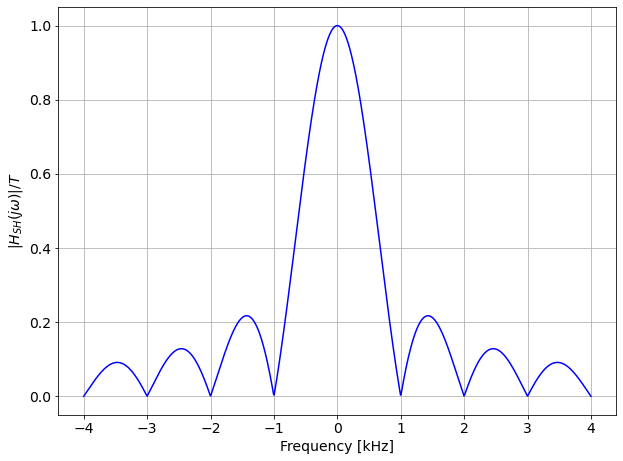

In [96]:
T = 1e-3
f = np.linspace(-4e3, 4e3, 1000)
H_sh = T*np.exp(-1j*w*T/2)*np.sinc(f*T)
plot_xy(1e-3*f, np.abs(H_sh)/T, 'Frequency [kHz]', r'$|H_{SH}(j\omega)|/T$')

 - The magnitude response of the S/H operation features a main "lobe" centered at DC and "nulls" (i.e. frequencies at which the magnitude is zero) at  integer multiples of the sampling frequency
 
 - The resulting distortion is linear, making it possible to recover the original signal by using an "reconstruction filter" (RCF) with a transfer function $H_e(j\omega) = 1/H_{SH}(j\omega)$
 
 - The RCF compensates for the attenuation introduced by the S/H sinc response by "peaking" at the Nyquist frequency (this can be implmented digitally)

## Track-and-hold

<center><img src="img/track_and_hold.png" width=700 /></center>

 - Another sampling circuit that is useful in mixed-signal circuits, and which appears in many discrete-time analog circuit structures, is the track-and-hold
 
 - By definition, the capacitor voltage $v_c$ "tracks" the input voltage $v_{sig}$ during the track phase and "holds" the voltage at the end of the track phase for the duration of the hold phase
 
 - When sampling an analog waveform for Nyquist-rate analog-to-digital conversion the "hold" portion of the T/H is used to avoid distortion that can result if the input voltage to the ADC were to change during a conversion

## MOS switches

<center><img src="img/TH_MOS_switch.png" width=700 /></center>

 - Switches in modern electronic systems are typically implmemented using MOS transistors
 
 - Due to the large value of $V_{gs}$ when the switch is in its "on" state (typically $V_{DD} - v_{sig}$), the MOS switch operates in triode 
 
 - The resistance of a MOS device in triode is well-approximated (assuming the square-law model) by
 
\begin{equation}
R_{on} = \dfrac{1}{\mu C_{ox}\tfrac{W}{L}(V_{gs} - V_{th})}
\end{equation}

 - $R_{on}$ determines both the speed with which a circuit like the T/H can operate, in addition to its noise performance
 
 - MOS transistors also exhibit charge injection, due to parasitic capacitances, that can degrade the performance of sampling circuits

## Track-and-hold noise

<center><img src="img/th_noise.png" width=800 /></center>

 - Due to the time-varying nature of the track-and-hold process, the output noise $v_c$ consists of two components, one associated with the track phase ($v_t$) and another with the hold ($v_h$) phase
 
 - The thermal noise due to the switch resistance $R_{on}$ is filtered by the $\tau_{RC}$ time constant caused by the capacitive loading of the switch 
 
 - To allow for adequate settling during the track phase, the $\tau_{RC}$ needs to be much shorter than the track period, resulting in noise aliasing 


## Settling requirements

 - The output voltage of the track-and-hold during a single period can be expressed as
 
\begin{equation}
v_c = (1-e^{-t/\tau_{RC}})v_{sig}
\end{equation}

 - Suppose we intend on sampling our signal with a 16-bit ADC, necessitating 16-bit settling precision for the T/H circuit
 
 - Assuming the T/H circuit limits the settling performance, this imposes a settling requirement given by
 
\begin{equation}
v_h = (1-e^{-T_s/\tau_{RC}})V_{fs} \geq \left(1 - \dfrac{1}{2^{16}}\right) V_{fs} \rightarrow \boxed{T_s \geq \tau_{RC}\ln 2^{16}}
\end{equation}

 - The sampling clock frequency can thus be related to the cutoff frequency of the $RC$ circuit, $f_c$, by
 
\begin{equation}
f_s \leq \dfrac{1}{2\pi\ln 2^{16}}f_c \approx 0.014 f_c
\end{equation}

## Track phase

<center><img src="img/TH_track_phase.png" width=800 /></center>

- If the switch were always closed, as in the continuous-time case, the power spectral density of the noise on $v_c$ would be 
 
\begin{equation}
S_{RC} = \dfrac{4kTR_{on}}{1+(2\pi f R_{on}C)^2}
\end{equation}

 - The total noise in this case is the same as that of a first-order $RC$ lowpass filter
 
\begin{equation}
v_{RC}^2 = \int_0^\infty \dfrac{4kTR_{on}}{1+(2\pi f R_{on}C)^2}df = \dfrac{kT}{C}
\end{equation}

<center><img src="img/TH_waveform.png" width=700 /></center>

 - If the switch operates such that it opens and closes with a period $T$, closed for a time $mT$ and open for $(1-m)T$, the result is a *cyclostationary* noise process with time-averaged spectral density (in the track phase) given by

\begin{equation}
S_t(f) = \dfrac{4mkTR_{on}}{1+(2\pi f R_{on}C)^2}
\end{equation}

 - The track phase noise power is likewise scaled by the duty cycle $m$:
 
\begin{equation}
v_t^2 = \dfrac{mkT}{C}
\end{equation}

## Hold phase

<center><img src="img/TH_hold_phase.png" width=800 /></center>

 - The hold phase component of the noise, $v_h$, is constructed by sampling the noise waveform at the end of every track phase then holding that value for the hold duration (the same operation performed on the signal)
 
 - The sampling process results in aliasing, causing replicas of the Nyquist-band noise density to appear at intervals of the sampling frequency $f_s=1/T$ 
 
\begin{equation}
S_s = \sum_{k=-\infty}^{\infty}S_{RC}(f-kf_s)
\end{equation}

 - The effect of aliasing is to concentrate the full noise power of the switch resistance in the baseband (i.e. the Nyquist band) of the sampling process


## T/H aliasing

<center><img src="img/TH_aliasing.png" width=1000 /></center>

 - The effect of aliasing can be approximated by by splitting the effective noise bandwidth from $-f_{EBW}$ to $f_{EBW}$ into $N$ rectangles, where $N$ is the ratio given by
 
\begin{equation}
N = 2\dfrac{f_{EBW}}{f_s} = \dfrac{1}{2R_{on}Cf_s}
\end{equation}

 - The noise in each of the $N$ rectangles is uncorrelated with that of the others, so these can be combined by summing their noise powers, giving the total S/H noise power to be
 
\begin{align}
S_s(f) = \sum_{n=-N/2}^{N/2-1}2kTR_{on} &= 2kTR_{on}\cdot N\\
&=2kTR_{on}\cdot\dfrac{1}{2R_{on}Cf_s} \\
&= \dfrac{kT}{Cf_s}
\end{align}

  - *Figure source: Simulating Switched-Capacitor Filters with SpectreRF*

## Zero-order-hold

 - Recall that the transfer function of a zero-order hold can be expressed as

\begin{equation}
H_{S/H}(j\omega) = e^{-j\omega T/2}\cdot T\dfrac{\sin(\omega T/2)}{\omega T/2}\
\end{equation}

 - This results in shaping of the sampled noise power spectral density by the $\text{sinc}(x)$ response of the S/H operation

\begin{equation}
S_{h}(f) = \left(\dfrac{\sin(\pi f (1-m)T)}{\pi f (1-m)T}\right)^2 S_s (f) = (1-m)^2\left(\dfrac{\sin(\pi f (1-m)T)}{\pi f (1-m)T}\right)^2\cdot 2 \dfrac{kT}{Cf_s}
\end{equation}

 - The $\text{sinc}(x)$ function approaches $1$ for small arguments, so for $f << f_s$, $S_h$ can be approximated as
 
\begin{equation}
S_h(f) \approx 2(1-m)^2\dfrac{kT}{f_s C}
\end{equation}

## Composite noise

 - The (one-sided) spectral density T/H noise is the sum of the track-and hold-noise components (which are essentially uncorrelated)

\begin{equation}
S_c(f) = S_t(f) + S_h(f) = \dfrac{4mkTR_{on}}{1+(2\pi f R_{on}C)^2} + (1-m)^2\left(\dfrac{\sin(\pi f (1-m)T)}{\pi f (1-m)T}\right)^2\cdot2 \dfrac{kT}{Cf_s}
\end{equation}

 - The composite T/H noise contains what can be thought of as a "direct" noise term $S_t(f)$, which corresponds to the scaled noise of the continuous-time case, and an "indirect" noise term $S_h(f)$ due to the S/H operation 
 
 - While the RMS noise is the same as that of the continuous-time case (i.e. $kT/C$) the distribution of the T/H noise as a function of frequency depends on the relationship between $f_s$ and $f_c = 1/2\pi R_{on}C$ 
 
 - That is, if $f_c >> f_s$, the PSD of the direct noise will occupy a broad frequency band while that of the S/H noise will be concentrated in a narrow band, below the first null of the sinc response 

 - Let's take a look at the noise expected with a 16-bit settling requirement

In [340]:
Ts = .1e-3
m = .5
k = 1.38e-23
T = 300
t_hold = (1-m)*Ts 
f = np.logspace(-2, 6, 8000)
Nbits = 16
R_on = 100
fc = 2*np.pi*np.log(2**Nbits)/Ts
C = 1/2/np.pi/R_on/fc
S_t = 4*k*T*m*R_on/(1+(f/fc)**2)
S_h = ((1-m)*np.sinc(f*t_hold))**2*2*(k*T*Ts/C)
S_c = S_t + S_h

 - If $f_s << f_c$ (typical case), the aliased/sinc-shaped noise will dominate 
 
 - Conversely if $f_s >> f_c$ (minimal aliasing), the direct noise will dominate

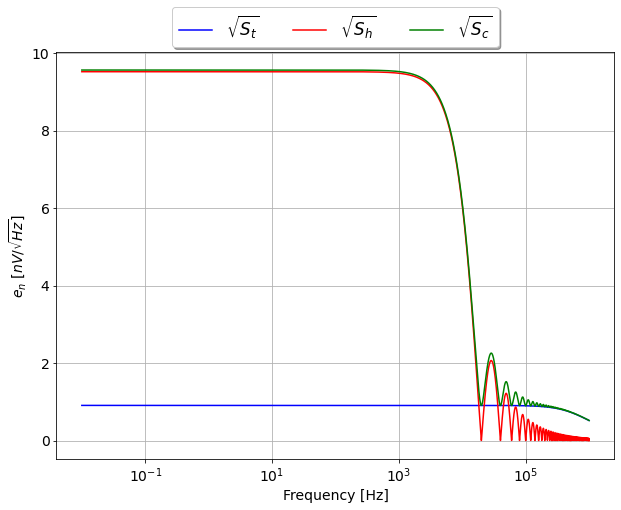

In [341]:
plot_log3xy(f, 1e9*np.sqrt(S_t), 1e9*np.sqrt(S_h), 1e9*np.sqrt(S_c), 
         'Frequency [Hz]', r'$e_{n}$ [$nV/\sqrt{Hz}$]',
        r'$\sqrt{S_t}$', r'$\sqrt{S_h}$', r'$\sqrt{S_c}$')

 - The direct noise $S_t$ is distributed over a wide bandwidth, while the majority of the sampled noise $S_h$ is concentrated in the Nyquist band
 
 - Due to the settling requirement, a significant amount of aliasing is observed
 
 - In all cases, the total noise power is given by $kT/C$

## Errors in active RC filters

## Switched-capacitor filters

<center><img src="img/SC_resistor.png" width=1200 /></center>

 - Switched-capacitor filters address the manufacturing issues associated with active RC filters by using *simulated* resistors comprising switches (i.e. MOS transistors) and capacitors
 
 - In the above circuit, $\phi_1$ and $\phi_2$ are *non-overlapping* clock signals controlling on/off states of the two switches
 
 - During each clock interval $T$ a charge given by $C(v_1 - v_2)$ enters at node $v_1$ and leaves at node $v_2$
 
 - The *average* current $i$ flowing between $v_1$ and $v_2$ is thus
 
\begin{equation}
i\equiv \dfrac{\Delta q_1}{T} = \dfrac{\Delta q_2}{T} = \dfrac{C}{T}(v_1 - v_2)
\end{equation}

 - From the preceding expression we can define an equivalent resistance equal to the voltage difference across the "resistor" divided by the average current
 
\begin{equation}
R\equiv \dfrac{T}{C}\dfrac{v_1 - v_2}{(v_1 - v_2)} = \dfrac{T}{C}
\end{equation}

 - Thus, the "switched-capacitor" circuit behaves as a resistor defined by the clock period $T$ and the capacitance $C$
 
 - Structures such as this enable the construction of active filters using only switches, capacitors, and opamps
 
 - This design approach allows us to define filter transfer functions solely in terms of *ratios* of capacitances, overcoming one of the major shortcomings of active RC filters (particularly in ICs)

## Switched-capacitor integrator

<center><img src="img/switched_capacitor_integrator.png" width=1000 /></center>

 - A switched-capacitor equivalent of the active integrator is shown here
 
 - When $\phi_1$ is high, the input switch is closed and $C_1$ charges to $v_{in}$, storing a charge equal to $\Delta q_1 = C_1v_{in}(t_n)$
 
 - At $t = t_n + T/2 - \tau$, $\phi_2$ rises to 1, connecting $C_1$ between the opamp's virtual ground and actual ground, discharging it, causing a charge to flow into $C_2$ given by 
 
\begin{equation}
\Delta q_2(t_n + T/2 - \tau) = C_1v_{in}(t_n)
\end{equation}
 
 - The voltage across $C_2$ thus changes by 
 
\begin{equation}
\Delta v_{c1}(t_n + T/2 - \tau) = (C_1/C_2)v_{in}(t_n)
\end{equation}
 

 - A difference equation base on the above analysis can be established between the samples of $v_{in}$ and $v_{out}$ taken an times $t_{n-1}$, $t_n$, $t_{n+1}$, and so on
 
\begin{align}
v_{out}(t_{n+1}) - v_{out}(t_n) &= -v_{C2}(t_{n+1}) + v_{C2}(t_n) \\
&= -\Delta v_{C2}(t_n + T/2 - \tau) = -(C_1/C_2)v_{in}(t_n)
\end{align}

 - We can use the $z$-transform to develop a transfer function between $v_{in}$ and $v_{out}$

\begin{equation}
V_{out}(z)(z-1) = -(C_1/C_2)V_{in}(z) \rightarrow H(z) \equiv \dfrac{V_{out}(z)}{V_{in}(z)} = -\dfrac{C_1/C_2}{z-1} = \boxed{-\dfrac{C_1}{C_2}\dfrac{z^{-1}}{1-z^{-1}}}
\end{equation}

 - Setting $z = e^{j\omega T}$ gives us

\begin{equation}
H(e^{j\omega T}) = -\dfrac{C_1/C_2}{e^{j\omega T} - 1}
\end{equation}


## Noise in the SC integrator

<center><img src="img/SC_integrator_noise.png" width=1200 /></center>

 - The switched-capacitor integrator exhibits noise due to the $R_{on}$ of the two switches and the opamp voltage noise
 
 - Like the track-and-hold circuit, the noise properties of the integrator are time-dependent, so we must analyze the noise during the two phases of operation, $\phi_1$ and $\phi_2$, separately

<center><img src="img/SC_int_noise_phi2.png" width=1000 /></center>

 - For the subcircuit active during $\phi_2$, assuming ideal opamp operation (i.e. $A_0 \gg 1$ and $\omega/\omega_t\ll 1$), the (two-sided) PSD of the output noise is given by
 
\begin{equation}
S_2^d \approx 2mkT[(C_1/C_2)^2 R_{on2} + (1+C_1/C_2)^2 R_{eq}]
\end{equation}

 - This is the "direct" noise (i.e. un-sampled) seen at the output of the integrator during $\phi_2$

 - $R_{eq}$ is the equivalent resistance that would generate the same thermal noise density of the opamp (i.e. $R_{eq} = 4kT/e_{na}$)
 
 - In general, $R_{eq} \gg R_{on}$

<center><img src="img/SC_int_noise_phi1.png" width=1000 /></center>

 - During $\phi_1$ the direct noise is given by
 
\begin{equation}
S_1^d \approx (1-m)2kTR_{eq}
\end{equation}

 - As in the T/H circuit, the noise sampled onto $C_1$ during $\phi_1$ contributes sampled noise given by 

\begin{equation}
S_h(f) \approx 2(1-m)^2\dfrac{kT}{f_s C}
\end{equation}

 - Here, $e_{n1}$ does not contribute to direct noise since there is no direct path between $e_{n1}$ and the output capacitance $C_2$

 - The square of the transfer function magnitude of the integrator is given by

\begin{equation}
|H(e^{j\omega T})|^2 = \dfrac{(C_1/C_2)^2}{4\sin^2(\omega T/2)}
\end{equation}

 - For frequencies much lower than the sampling frequency ($f\ll f_s$), $\sin (x) \approx x$ and $\text{sinc}(x) \approx 1$, resulting in a sampled noise power spectral density given by

\begin{equation}
S_{S/H} \approx (1-m)^2\dfrac{kT}{f_s C_1}\left(1+\dfrac{(R_{on} + R_{eq})C_1\omega_t}{C_1/C_2 + 1}\right)\left(\dfrac{C_1/C_2}{\omega T}\right)^2
\end{equation}

 - The first term is from the noise due to the input switch, $e_{n1}$, while the second term contains contributions from the second switch and the opamp
 
 

## Summary

 - Mixed-signal systems are examples of *sampled-data systems*, since they all involve the use of sampled signals at some point in the signal chain
 
 - Laplace transforms are used to represent continuous-time signals and systems, while the $z$-transform is used to represent discrete-time (i.e. sampled) signals
 
 - The sampling process introduces aliasing if the Nyquist criterion, which requires limiting the bandwidth of the sampled signal to less than half of the sampling frequency, is not observed
 
 - Sampled-data circuits inherently exhibit noise aliasing due to the requirement that sampled voltage n